# Projeto 3: Verificação da eficiência da campanha sobre vendas de depósito bancário a prazo por meio de telemarketing

Um banco português solicitou uma pesquisa sobre a eficiência da campanha sobre vendas de depósito bancário a longo prazo por meio de telemarketing, i.e. por algum meio de contato telefônico. O potencial cliente é submetido à uma série de questionamentos onde as respostas são registradas como mostram os campos abaixo, que como podem ser percebidos há alguns com valores categóricos e numéricos, que são as variáveis independentes. O resultado da abordagem pode induzir o potencial cliente a adquirir um plano de depósito bancário a longo prazo, ou não. Isto é representado por uma variável dependente "y", que contém um valor categórico yes (sim) ou não (no). O nosso problema é tentar encontrar um modelo de predição que meça a eficiência da campanha, baseado no dataset [2], que é um repositório de dados de machine learning disponibilizado ao público, depois de uma pesquisa realizada por um banco português [1]. Para tentar resolver esse problema, vamos utilizar um classificador Supervised Learning, como já é dado uma variável dependente. Logistic Regression é a primeira opção.

### Dados do cliente do banco:
<ol>
<li>age (numeric)</li>
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')</li>
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)</li>
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</li>
<li>default: has credit in default? (categorical: 'no','yes','unknown')</li>
<li>housing: has housing loan? (categorical: 'no','yes','unknown')</li>
<li>loan: has personal loan? (categorical: 'no','yes','unknown')</li>
</ol>

### Dados relativos ao último contato dentro da campanha corrente
<ol>
<li value="8">contact: contact communication type (categorical: 'cellular','telephone')</li>
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'</li>
<li>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
</ol>

### Outras atividades:
<ol>
<li value="12">campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric).</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').</li>
</ol>

### Atributos do contexto social e econômico
<ol>
<li value='16'>emp.var.rate: employment variation rate - quarterly indicator (numeric)</li>
<li>cons.price.idx: consumer price index - monthly indicator (numeric)</li>
<li>cons.conf.idx: consumer confidence index - monthly indicator (numeric)</li>
<li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
<li>nr.employed: number of employees - quarterly indicator (numeric)</li>
</ol>

### Variável Dependente (variável de predição):
<ol>
<li value='21'>y - has the client subscribed a term deposit? (binary: 'yes','no')</li>
</ol>

### Referência 

<p>[1] [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014</p>

<p>[2] Bank Marketing Data Set, Machine Learning Repository, http://archive.ics.uci.edu/ml/datasets/Bank+Marketing, accessed: 2020-07-15</p>

## 1. Extração e Exploração dos Dados

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data=pd.read_csv('bank-additional-full.csv',header=0,sep=';')
data=data.dropna()
import warnings
warnings.filterwarnings('ignore')
print('dimensões do dataframe: ',data.shape)
print(' ')
print("colunas: ",list(data.columns))
print(" ")
data.info()
print(" ")
print(data.describe())

dimensões do dataframe:  (41188, 21)
 
colunas:  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campa

Nota: Observa-se que 25%, 50%, 75% e o max da amostra da variável pdays está em 999, que significa que o cliente não foi previamente contatado em nenhuma campanha prévia. Algum tratamento deverá ser realizado.

Abaixo observa-se a distribuição do pdays

In [2]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

Nota: o valor 999 pode corromper a estatística do pdays.

### Verificação dos dados categóricos

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Nota: Observa-se variáveis numéricas e categoricas

In [4]:
cat_col = [n for n in data.columns if data[n].dtypes == 'object']
for col in cat_col:
    print(col, '**********************  \n')
    print(data[col].value_counts())
    print("  ")

job **********************  

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
  
marital **********************  

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
  
education **********************  

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
  
default **********************  

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
  
housing **********************  

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Nota: a variável dependente y deverá ser reatribuída com valores (0,1) em vez de (no, yes). A variável contact pode ser binária também, i.e. cellular pode ser 0 e telephone pode ser 1.

### Verificação de subscrições obtidas depois da campanha

No_sub= 36548  Sub= 4640
Porcentagem de subscrição:  11.265417111780131
Porcentagem de sem subscrição:  88.73458288821988


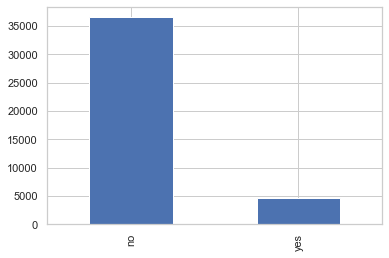

In [2]:
No_sub = len(data[data['y']=='no'])
Sub = len(data[data['y']=='yes'])
print('No_sub=',No_sub,' Sub=',Sub)
percent_No_sub = (No_sub/len(data['y']))*100
percent_sub=(Sub/len(data['y']))*100
print('Porcentagem de subscrição: ',percent_sub)
print('Porcentagem de sem subscrição: ',percent_No_sub)

data['y'].value_counts().plot.bar()

Nota: yes e no pode ser transformado em valores binários 1 e 0, respectivamente.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78BD72C08>,
      dtype=object)

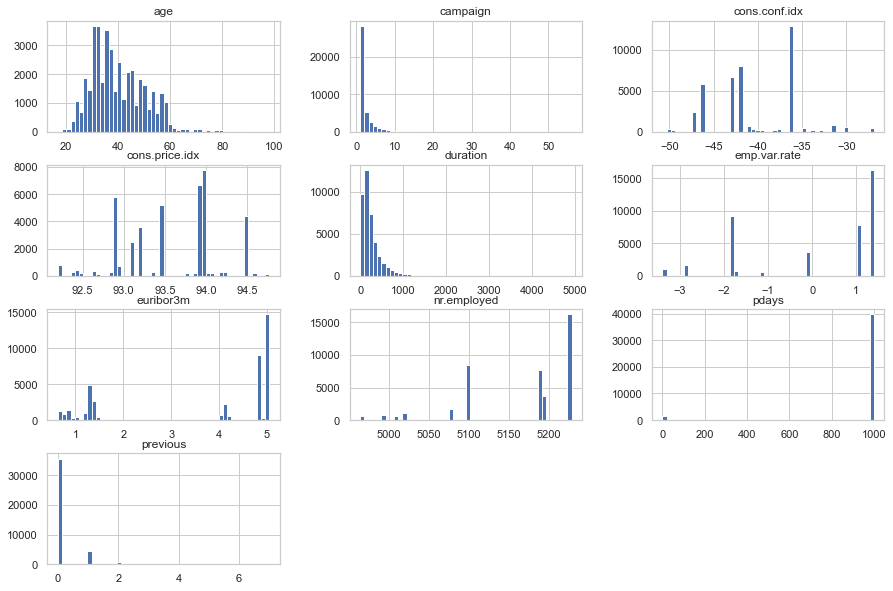

In [3]:
data.hist(bins=50,figsize=(15,10))

Nota: pdays necessita de um ajuste. Não é razoável que pdays contenha valores em dias depois do último contato e 999 significar que não houve um prévio contato.

## 2. Preparação de Dados

### 2.1 Preparação da variável dependente y

In [4]:
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y']=np.where(data['y'] =='no',  0, data['y'])

### 2.2 Tratamento da variável pdays e contact

In [5]:
data['pdays_no_contact']=(data['pdays']==999)*1
contact=({'cellular':0, 'telephone':1})
data['contact']=data['contact'].map(contact)

### 2.3 Criação de variáveis dummy para variáveis categóricas

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,services,married,high.school,unknown,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,services,married,high.school,no,yes,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,services,married,high.school,no,no,yes,1,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1


Nota: foi criado uma coluna adicional pdays_no_contact e a coluna contact ficou binária, cellular=0, telephone=1. A variável dependente y ficou binária também 0 (no) e 1 (yes), i.e. não e sim para a subscrição à campanha de venda de depósito a prazo.

In [7]:
df=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan',
                                  'month','day_of_week','poutcome'], drop_first=True)

df.shape

(41188, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   duration                       41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  object 
 12  pdays_no_contact               41188 non-null 

In [9]:
df.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
3,40,1,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
4,56,1,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0


Nota: variáveis categóricas foram transformadas em binárias

### 2.4 Balanceamento de amostras com o algoritmo SMOTE (Synthetic Minority Oversampling Technique).

O SMOTE opera na criação de amostras sintéticas da classe menor (no-subscription) em vez de criar cópias.

O mesmo escolhe de forma aleatória o k-nearest-neighbors e com a qual se cria uma cópia similar, mas com novas observações.

Se implementa o SMOTE da seguinte forma:

conda install -c conda-forge imbalanced-learn

conda update --all

In [10]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [11]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train.astype(int))
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data for training is ",len(os_data_X))
print("Number of no subscription in oversampled data for training",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription for training",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data for trainining is ",
      len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data for training is ",
      len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print(" ")
os_test_X,os_test_y=os.fit_sample(X_test, y_test.astype(int))
os_test_X = pd.DataFrame(data=os_test_X,columns=columns )
os_test_y= pd.DataFrame(data=os_test_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data for test is ",len(os_test_X))
print("Number of no subscription in oversampled data for test",len(os_test_y[os_test_y['y']==0]))
print("Number of subscription for test",len(os_test_y[os_test_y['y']==1]))
print("Proportion of no subscription data in oversampled data for test is ",
      len(os_test_y[os_test_y['y']==0])/len(os_test_X))
print("Proportion of subscription data in oversampled data for test is ",
      len(os_test_y[os_test_y['y']==1])/len(os_test_X))
print(" ")

length of oversampled data for training is  51158
Number of no subscription in oversampled data for training 25579
Number of subscription for training 25579
Proportion of no subscription data in oversampled data for trainining is  0.5
Proportion of subscription data in oversampled data for training is  0.5
 
length of oversampled data for test is  21938
Number of no subscription in oversampled data for test 10969
Number of subscription for test 10969
Proportion of no subscription data in oversampled data for test is  0.5
Proportion of subscription data in oversampled data for test is  0.5
 


Nota: A proporção de amostras com subscrição ao deposito à prazo é equivalente à da amostra com sem subscrição.

### 2.5 Normalização dos dados

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_training=sc.fit_transform(os_data_X)
X_testing=sc.transform(os_test_X)

## 3. Treinando os dados

### 3.1 Obtenção do Modelo

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_training,os_data_y)
print('Train Accuracy: ',clf.score(X_training,os_data_y))
print("CRV Test Accuracy: ", clf.score(X_testing, os_test_y))

Train Accuracy:  0.9361781148598459
CRV Test Accuracy:  0.93677636976935


### 3.2 Obtenção da Matriz de Confusão

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range(0, cm.shape[0]):
        for j in range(0, cm.shape[1]):
            if(cm[i, j]>2000):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center", color="white")
                         #color="black" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center", color="black")
                         #color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Data')
    plt.xlabel('Predicted Data')

In [15]:
y_pred = clf.predict(X_testing)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(os_test_y,y_pred)
cm

array([[10354,   615],
       [  772, 10197]], dtype=int64)

Confusion matrix, without normalization


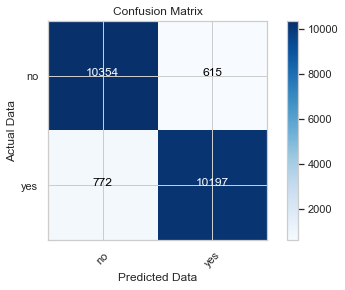

In [16]:
classes = ['no', 'yes']
plot_confusion_matrix(cm,classes=classes, normalize=False,title='Confusion Matrix')

Nota: O modelo usando Logistic Regression resultou em 93.6% de acurácia em dados de treino e teste. A matrix de confusão indica que o modelo fez predição de 10354 de não subscrição à campanha de depósito à prazo e 10197 com a correta predição. Predições incorretas foram de 1387.

# 4. Testando o Modelo

## 4.1 Aquisição e verificação dos dados para teste

In [17]:
data2=pd.read_csv('bank-additional.csv',header=0,sep=';')
data2=data2.dropna()
print(data2.shape)
print(list(data2.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


No_sub= 3668  Sub= 451
Porcentagem de subscrição:  112.64870114105365
Porcentagem de sem subscrição:  89.0507404709881


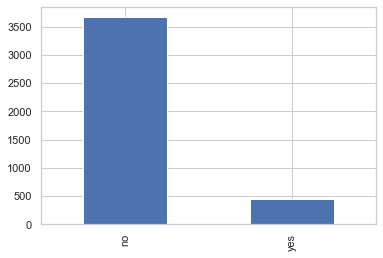

In [18]:
No_sub2 = len(data2[data2['y']=='no'])
Sub2 = len(data2[data2['y']=='yes'])
print('No_sub=',No_sub2,' Sub=',Sub2)
percent_No_sub2 = (No_sub2/len(data2['y']))*100
percent_sub2=(Sub/len(data2['y']))*100
print('Porcentagem de subscrição: ',percent_sub2)
print('Porcentagem de sem subscrição: ',percent_No_sub2)

data2['y'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204E3D17F08>,
      dtype=object)

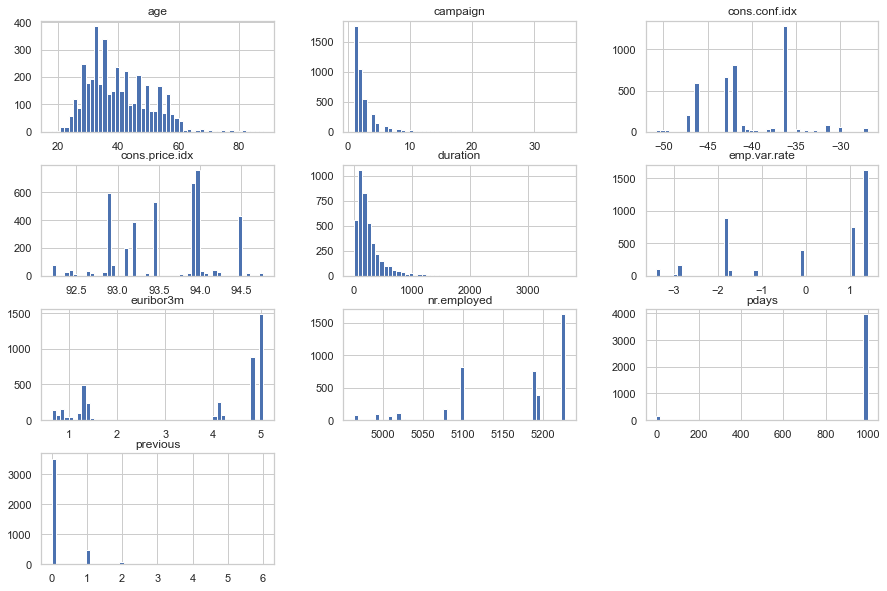

In [41]:
data2.hist(bins=50,figsize=(15,10))

## 4.2 Preparação dos dados

In [19]:
data2['y']=np.where(data2['y'] =='yes', 1, data2['y'])
data2['y']=np.where(data2['y'] =='no',  0, data2['y'])
data2['pdays_no_contact']=(data2['pdays']==999)*1
contact=({'cellular':0, 'telephone':1})
data2['contact']=data2['contact'].map(contact)

In [43]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_no_contact
0,30,blue-collar,married,basic.9y,no,yes,no,0,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,services,single,high.school,no,no,no,1,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,1
2,25,services,married,high.school,no,yes,no,1,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1
3,38,services,married,basic.9y,no,unknown,unknown,1,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,1
4,47,admin.,married,university.degree,no,yes,no,0,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1


## 4.3 Criação de variáveis dummy

In [20]:
df2=pd.get_dummies(data2,columns=['job','marital','education','default','housing','loan',
                                  'month','day_of_week','poutcome'], drop_first=True)

df2.shape

(4119, 55)

In [45]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4119 entries, 0 to 4118
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   contact                        4119 non-null   int64  
 2   duration                       4119 non-null   int64  
 3   campaign                       4119 non-null   int64  
 4   pdays                          4119 non-null   int64  
 5   previous                       4119 non-null   int64  
 6   emp.var.rate                   4119 non-null   float64
 7   cons.price.idx                 4119 non-null   float64
 8   cons.conf.idx                  4119 non-null   float64
 9   euribor3m                      4119 non-null   float64
 10  nr.employed                    4119 non-null   float64
 11  y                              4119 non-null   object 
 12  pdays_no_contact               4119 non-null   i

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,0,487,2,999,0,-1.8,92.893,-46.2,1.313,...,1,0,0,0,0,0,0,0,1,0
1,39,1,346,4,999,0,1.1,93.994,-36.4,4.855,...,1,0,0,0,0,0,0,0,1,0
2,25,1,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,0,1,1,0
3,38,1,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,0,0,0,0,0,0,1,0
4,47,0,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,1,0,0,1,0,0,0,1,0


## 4.4 Separação da variável dependente (y) e variáveis independentes (X)

In [21]:
X2 = df2.loc[:, df2.columns != 'y']
y2 = df2.loc[:, df2.columns == 'y']
#from imblearn.over_sampling import SMOTE
#os2 = SMOTE(random_state=0)
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
#columns = X2_train.columns

In [22]:
X2.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,0,487,2,999,0,-1.8,92.893,-46.2,1.313,...,1,0,0,0,0,0,0,0,1,0
1,39,1,346,4,999,0,1.1,93.994,-36.4,4.855,...,1,0,0,0,0,0,0,0,1,0
2,25,1,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,0,1,1,0
3,38,1,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,0,0,0,0,0,0,1,0
4,47,0,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,1,0,0,1,0,0,0,1,0


In [23]:
y2.head()

,y
0,0
1,0
2,0
3,0
4,0


## 4.5 Normalização dos dados

In [24]:
from sklearn.preprocessing import StandardScaler
sc2=StandardScaler()
X2_norm=sc2.fit_transform(X2)
#X2_testing=sc2.transform(X2_test)

In [25]:
X2_norm

array([[-0.98075178, -0.74375226,  0.90395178, ..., -0.48904977,
         0.41130767, -0.18895848],
       [-0.10799146,  1.34453373,  0.35030022, ..., -0.48904977,
         0.41130767, -0.18895848],
       [-1.46561862,  1.34453373, -0.11696598, ...,  2.04478167,
         0.41130767, -0.18895848],
       ...,
       [-1.27167189, -0.74375226, -0.75700288, ..., -0.48904977,
        -2.43127   , -0.18895848],
       [ 1.73450254, -0.74375226,  1.06494265, ..., -0.48904977,
         0.41130767, -0.18895848],
       [-0.59285831, -0.74375226, -0.32114953, ...,  2.04478167,
         0.41130767, -0.18895848]])

## 4.6 Aplicação do modelo obtido na fase de treinamento e CRV

In [28]:
y2_pred=clf.predict(X2_norm)

In [29]:
y2.head()

,y
0,0
1,0
2,0
3,0
4,0


## 4.7 Aplicação da Matriz de Confusão

In [30]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2.astype(int),y2_pred.astype(int))
cm2

array([[2167, 1501],
       [   4,  447]], dtype=int64)

Confusion matrix, without normalization


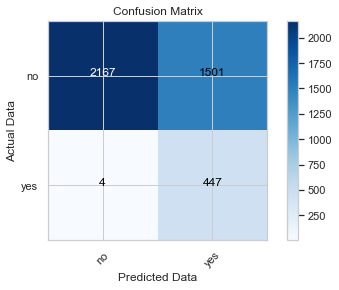

In [31]:
classes = ['no', 'yes']
plot_confusion_matrix(cm2, classes=classes, normalize=False,title='Confusion Matrix')

Nota: 1501 de FN mostra que a aplicação do modelo à amostra de teste ainda está desbalanceada.

## 4.8 Classificação

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y2.astype(int), y2_pred.astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      3668
           1       0.23      0.99      0.37       451

    accuracy                           0.63      4119
   macro avg       0.61      0.79      0.56      4119
weighted avg       0.91      0.63      0.70      4119



Nota: Praticamente todos os índices atingiram 93%. Isso mostra que o modelo de predição está ajustado.

## 4.9 Curva ROC 

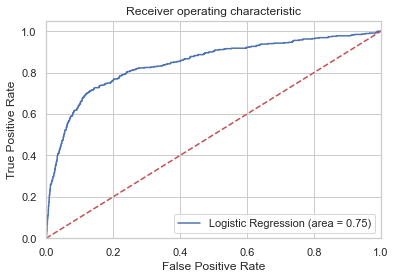

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2 = roc_auc_score(y2.astype(int), clf.predict(X2_norm.astype(int)))
fpr, tpr, thresholds = roc_curve(y2.astype(int), clf.predict_proba(X2_norm.astype(int))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4.10 Cálculo do AUC

In [42]:
lr_probs1=clf.predict_proba(X2_norm.astype(int))
ns_probs1 = [0 for _ in range(len(y2))]
lr_probs1=lr_probs1[:, 1]
# calculate scores
ns_auc1 = roc_auc_score(y2.astype(int), ns_probs1)
lr_auc1 = roc_auc_score(y2.astype(int), lr_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc1))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


Note: AUC=0.845 atingiu um ótimo score.

## 4.11 Análise de componentes principais

In [53]:
clf.coef_

array([[-0.22371068, -0.52067983,  1.98430873, -0.19882282, -0.58967379,
        -0.41252318, -3.13070299,  0.81371821,  0.01574304,  3.00209025,
        -1.47179425, -0.09359735, -0.76775834, -0.20020548, -0.28933859,
        -0.19223205, -0.22728519, -0.20696707, -0.3291333 , -0.10941665,
        -0.35787805, -0.16417954, -0.1160535 , -0.44926319, -0.46612657,
        -0.03804678, -0.32904831, -0.57047989, -0.92795468, -0.01183577,
        -0.60756242, -1.01519334, -0.33141266, -0.28656582, -0.0190425 ,
        -0.06580684, -0.19558479, -0.06580684, -0.18091687, -0.23631995,
        -0.09296117, -0.50831372, -0.43916577,  0.07083278, -0.76962831,
        -0.66373011, -0.2392753 , -0.22054566, -0.47666125, -0.43552451,
        -0.3814302 , -0.38551889, -0.17114494,  0.04939042]])

Nota: Logistic Regression nativamente não traz informações sobre pValue, assim
não é possível avaliar a importância das features. No entanto, o pacote estatístico statsmodels
pode listar o pValue das variáveis.

In [55]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))

result=logit_model.fit()
print(result.summary2())

         Current function value: 0.209085
         Iterations: 35
                                         Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.406     
Dependent Variable:             y                          AIC:                        17329.5839
Date:                           2020-07-23 18:54           BIC:                        17786.7567
No. Observations:               41188                      Log-Likelihood:             -8611.8   
Df Model:                       52                         LL-Null:                    -14499.   
Df Residuals:                   41135                      LLR p-value:                0.0000    
Converged:                      0.0000                     Scale:                      1.0000    
No. Iterations:                 35.0000                                                          
----------------------------------------------------------------------------------------------

Nota: variáveis cujo pValue < 0.05 (5%) pode rejeitar a hipótese Ho, no qual a variável é não significante para a composição da variável dependente y. Dessa forma, podemos deduzir que as seguintes variáveis são não significantes: age (idade), pdays (dias do último contato), emp.var. rate, cons.price.idx, pdays_no_contact, job_entrepreneur, job_management, job_sel-employed, job_services, job_technician, job_unemployed, job_unknown, Marital_married, marital_single, marital_unknown, education_basic.6y, education_basic.9y, education_high.school, education_illiterate, education_professional.course, education_unknown, default_yes, housing_unknown, housing_yes, loan_unknown, loan_yes, day_of_week_mon, day_of_week_thu, day_of_week_tue.

# 5. Conclusão

A campanha de promoção de vendas de depósito bancário à prazo, por meio de telemarketing, obteve subscrição de apenas 11 % dos potenciais clientes abordados. Possivelmente, devido ao fato que a abordagem para determinadas classes ou condições sociais econômicas sejam impeditivas ou não entenderem o tipo de investimento que lhes são propostos. Depósito bancário à prazo pode ser interessante se os juros pagos no resgate forem também interessantes. O euribor3m é a é taxa interbancária contra a qual um grupo representativo de bancos europeus contrai empréstimos mutuamente cuja duração é de 3 meses, muito similar o CDB do Brasil, o ajuste de juros de empréstimos, conta poupança, hipoteca, etc seguem essa taxa. O nosso modelo indicou o eurobor3m como feature importante, como esperado que fosse. Algumas pessoas veem valor com esse tipo de transação bancária, pois pode emprestar o dinheiro por um tempo para o banco em troca de juros, como é o caso de aposentados (job_retired) e estudantes (job_student), pois tem nível universitário (education_university.degree) e portanto é de se esperar que entendam o mecanismo da aplicação financeira. O clima econômico parece favorecer potenciais clientes para aquisição da aplicação como indica a média trimestral do número total de cidadãos empregados (nr.employed) e a taxa de variação de empregabilidade trimestral (emp.var.rate). A enquete durante a campanha mostra que potenciais clientes escondem se os mesmos tem algum problema com débitos pendentes (default_unknown). Contato por meio de telefone ou celular (contact), ou mais de um contato (campaign), com o cliente, também se já houve um contato prévio bem sucedido (poutcome_success) ou não existente (poutcome_nonexistent), com uma certa duração (duration), parecem influir na aquisição do plano do depósito à prazo. Alguns meses no ano tiveram melhor aceitação da campanha como março, maio, julho, agosto, setembro, novembro e dezembro. O melhor dia da semana para abordar clientes foi quarta-feira.